2015 CAASPP test results.


* [Source Website](http://caaspp.cde.ca.gov/sb2015/ResearchFileList)
* [Data Dictionary](http://caaspp.cde.ca.gov/sb2015/research_fixfileformat)



In [2]:
import IPython
print IPython.sys_info()

{'commit_hash': u'8b0eef4',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Library/Python/2.7/site-packages/IPython',
 'ipython_version': '3.2.0',
 'os_name': 'posix',
 'platform': 'Darwin-14.5.0-x86_64-i386-64bit',
 'sys_executable': '/usr/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '2.7.10 (default, Jul 14 2015, 19:46:27) \n[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.39)]'}


In [25]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import pandas as pd
df = pd.read_csv('/Users/gonzalourrutia/Python/333-CAASPP/ca2015_all_csv_v1.txt', na_values='*'  )
df['School Code'].value_counts()
schools = df[df['School Code'] != 0]
mss = schools[['Subgroup ID','Grade','Test Id','Mean Scale Score']]

ent = pd.read_csv('/Users/gonzalourrutia/Python/333-CAASPP/ca2015entities_csv.txt')

ImportError: cannot import name _thread

# Scores By Race and Ethnicity, By School

These initial analyses compare the Mean Scale Scores for each race/ethnicity subgroup, for each school in the state. The scores are for Grade 11, reading test. 


In [19]:
mss = schools[['School Code','Subgroup ID','Grade','Test Id','Mean Scale Score']]
mss = mss[(mss['Grade'] == 11) & (mss['Test Id'] == 1)]
mss = mss[['School Code','Subgroup ID','Mean Scale Score']]
mssp = pd.pivot_table(mss,index='School Code', columns='Subgroup ID', values='Mean Scale Score')

## Summary Statistics For Race/Ethnicity

For each Race/Eth name, the suffix 'ED' means 'Economically Disadvantaged' -- usually assessed by paricipation in the free lunch program -- and 'P' means 'Not Economically Disadvantaged' ( Priviledged )

In [20]:
from pandas.tools.plotting import scatter_matrix

race_eth = mssp[[200,202,203,204,206]+[220, 222, 223, 224, 226]]
race_eth.columns = ['BlackED', 'AsianED', 'FilipinoED' , 'LatinoED', 'WhiteED', 
                    'BlackP', 'AsianP', 'FilipinoP' , 'LatinoP', 'WhiteP']
#scatter_matrix(race_eth, figsize=(15,15))
re_summary = race_eth.describe().T
re_summary

,count,mean,std,min,25%,50%,75%,max
BlackED,396,2527.781566,47.518842,2388.3,2498.375,2531.05,2561.825,2647.6
AsianED,311,2619.128939,47.606461,2421.6,2590.200,2621.00,2650.350,2750.8
FilipinoED,118,2609.539831,36.046385,2492.4,2586.225,2614.65,2631.925,2682.9
LatinoED,1524,2546.225525,56.372172,2308.4,2508.625,2557.70,2583.800,2729.1
WhiteED,726,2581.028788,45.125991,2432.9,2556.200,2585.40,2611.950,2695.7
BlackP,250,2580.009200,50.079676,2410.9,2550.725,2586.60,2616.550,2689.9
AsianP,376,2674.780851,37.636231,2488.2,2656.175,2678.75,2700.425,2766.2
FilipinoP,306,2650.473856,32.757949,2511.0,2630.975,2651.50,2672.950,2750.9
LatinoP,1081,2581.316189,56.423036,2376.5,2552.600,2591.50,2619.400,2735.3
WhiteP,964,2626.272407,49.004562,2414.8,2604.400,2632.40,2658.825,2744.0


Note that the Black mean is about 1 standard deviation ( ``std`` column ) below the White mean, while the Latino mean is about .6 std below and the Asian mean is about .6 std above. These are very common differences, which appear on almost any cognitive test, so it's a good check on the validity of the test. 

Additionally, note that the difference in economic status is also about 1 std. 

In [21]:
print re_summary.loc['BlackED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['LatinoED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['AsianED']['mean'] -re_summary.loc['WhiteED']['mean']
print re_summary.loc['WhiteP']['mean'] -re_summary.loc['WhiteED']['mean']

-53.2472222222
-34.8032629444
38.100151028
45.2436187602


# Histograms of Mean Scale Score

Histograms showing the spread of scores, first for Disadvantaged Whites vs Asians. This chart shows that the Asians aren't crowding the top of the scale, which would reduce the utility of the scores. 


In [22]:
race_eth[['WhiteED','AsianED']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

ImportError: cannot import name _thread

Note the odd shape, with a long flat tail to the right. 

In [23]:
race_eth[['WhiteED','LatinoED']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

ImportError: cannot import name _thread

Whites, Disadvantaged vs Priviledged.

In [24]:
race_eth[['WhiteED','WhiteP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

ImportError: cannot import name _thread

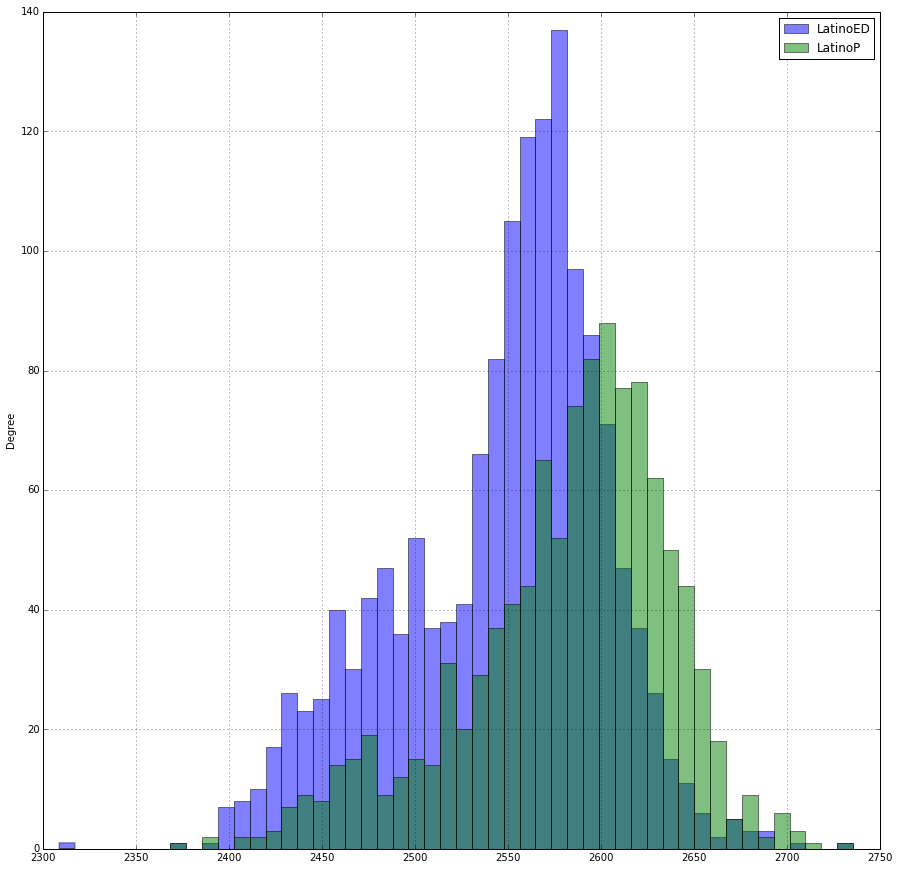

In [10]:
race_eth[['LatinoED','LatinoP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

Here are the two groups that are farthest apart, Disadvantaged Blacks and Priviledged Asians

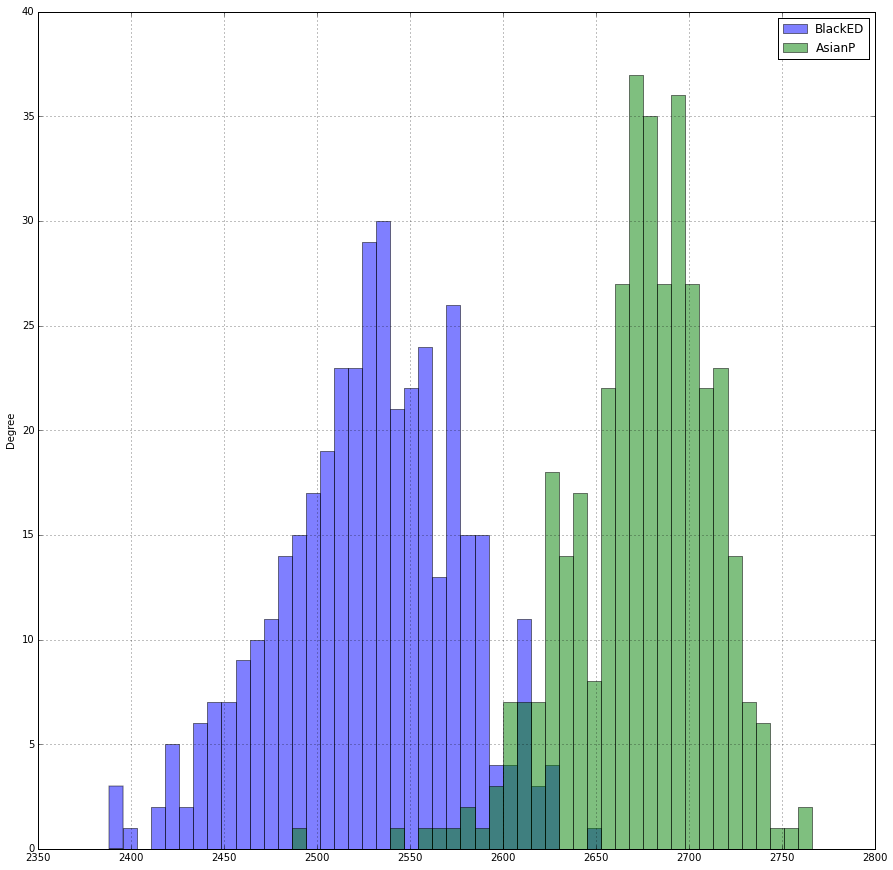

In [11]:
race_eth[['BlackED','AsianP']].plot(kind='hist', alpha=0.5, bins=50, figsize=(15,15))

### Differences between  Disadvantaged/Priviledged in Same School

These are histograms of the difference between the P and ED groups in a single school. It's surprising that there are a lot of schools where the scores for the disadvantaged group is higher than the priveledged group. 


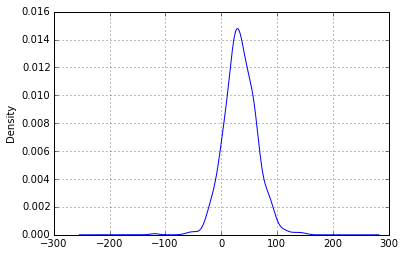

In [12]:
(race_eth['WhiteP'] - race_eth['WhiteED']).plot(kind='kde')

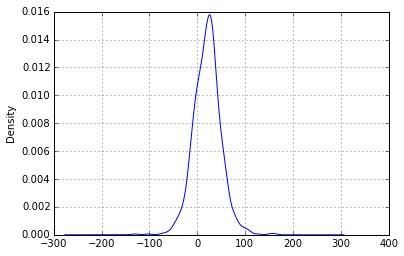

In [13]:
(race_eth['LatinoP'] - race_eth['LatinoED']).plot(kind='kde')

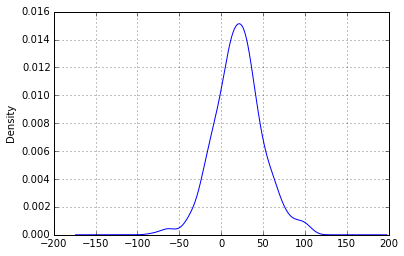

In [14]:
(race_eth['WhiteED'] - race_eth['LatinoED']).plot(kind='kde')

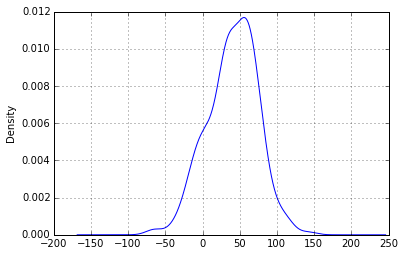

In [15]:
(race_eth['WhiteED'] - race_eth['BlackED']).plot(kind='kde')

# By Parent Education

In [16]:
from pandas.tools.plotting import scatter_matrix

parent = mssp[[90,91,92,93,94]]
parent.columns = ["< High", 'High School', 'Some College','College','Graduate']
p_re_summary = parent.describe().T
p_re_summary

,count,mean,std,min,25%,50%,75%,max
< High,1214,2542.951071,54.295279,2375.8,2511.275,2552.45,2577.90,2706.1
High School,1407,2558.903412,55.370149,2273.0,2529.100,2569.10,2595.85,2756.3
Some College,1379,2583.262364,53.816903,2402.9,2556.650,2592.50,2619.45,2739.5
College,1040,2620.761346,46.819830,2435.8,2595.300,2625.70,2652.50,2759.2
Graduate,787,2642.218424,49.988998,2433.1,2615.450,2649.70,2676.20,2757.0


In [17]:
print p_re_summary.loc['< High']['mean'] - p_re_summary.loc['College']['mean']
print p_re_summary.loc['College']['mean'] - p_re_summary.loc['Graduate']['mean']
print p_re_summary.loc['< High']['mean'] - p_re_summary.loc['Graduate']['mean']


-77.8102753136
-21.4570782426
-99.2673535562


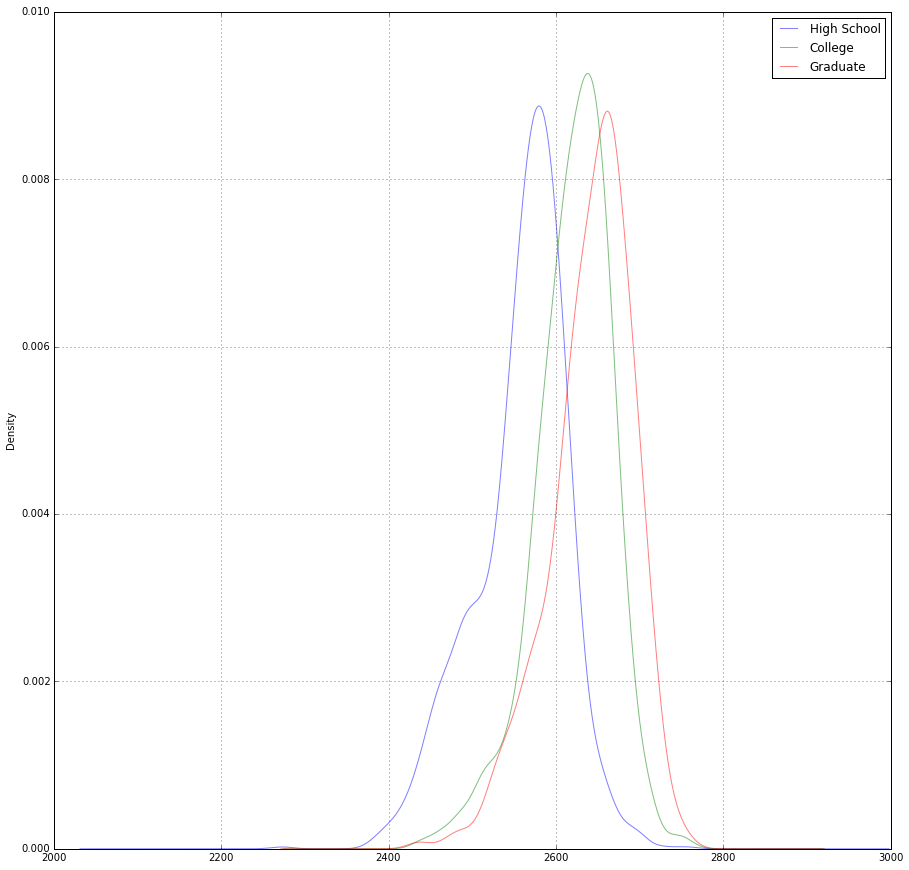

In [18]:
parent[['High School','College','Graduate']].plot(kind='kde', alpha=0.5,  figsize=(15,15))

In [19]:
ent.reset_index()


,index,County Code,District Code,School Code,Filler,Test Year,Type Id,County Name,District Name,School Name,Zip Code
0,0,0,0,0,NaN,2015,4,State of California,NaN,NaN,
1,1,1,0,0,NaN,2015,5,Alameda,NaN,NaN,
2,2,1,65,100065,NaN,2015,9,Alameda,Oakland Unity High,Oakland Unity High,
3,3,1,1212,101212,NaN,2015,9,Alameda,Kipp Summit Academy,Kipp Summit Academy,
4,4,1,1788,6001788,NaN,2015,9,Alameda,Cox Academy,Cox Academy,
5,5,1,2000,6002000,NaN,2015,9,Alameda,Lazear Charter Academy,Lazear Charter Academy,
6,6,1,6906,106906,NaN,2015,9,Alameda,Bay Area Technology,Bay Area Technology,
7,7,1,7839,107839,NaN,2015,9,Alameda,Livermore Valley Charter,Livermore Valley Charter,
8,8,1,8670,108670,NaN,2015,9,Alameda,Leadership Public Schools - Hayward,Leadership Public Schools - Hayward,
9,9,1,8944,108944,NaN,2015,9,Alameda,Lighthouse Community Charter High,Lighthouse Community Charter High,


In [20]:
df.columns

Index([u'County Code', u'District Code', u'School Code', u'Filler', u'Test Year', u'Subgroup ID', u'Test Type', u'Total CAASPP Enrollment', u'Total Tested At Entity Level', u'Total Tested At Subgroup Level', u'Grade', u'Test Id', u'CAASPP Reported Enrollment', u'Students Tested', u'Percent Tested', u'Mean Scale Score', u'Percentage Standard Exceeded', u'Percentage Standard Met', u'Percentage Standard Met and Above', u'Percentage Standard Nearly Met', u'Percentage Standard Not Met', u'Students with Scores', u'Area 1 Percentage Above Standard', u'Area 1 Percentage At or Near Standard', u'Area 1 Percentage Below Standard', u'Area 2 Percentage Above Standard', u'Area 2 Percentage At or Near Standard', u'Area 2 Percentage Below Standard', u'Area 3 Percentage Above Standard', u'Area 3 Percentage At or Near Standard', u'Area 3 Percentage Below Standard', u'Area 4 Percentage Above Standard', u'Area 4 Percentage At or Near Standard', u'Area 4 Percentage Below Standard'], dtype='object')

In [22]:

#df.apply(lambda row: '{}{}{}'.format(df['County Code'],
#                                     df['District Code'],
#                                     df['School Code']), axis=1)

KeyboardInterrupt: 